# Import the Packages

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


# Load the Data Set

In [71]:
data = pd.read_csv(r"C:\Users\student\Downloads\kc_house_data.csv")
data.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
5    101930     1.0           0     0  ...     11        3890           1530   
6      6819     2.0           0     0  ...      7        1715              0   
7      9711     1.0           0     0  ...      7        1060              0   
8      7470     1.0           0     0  ...      7        1050            730   
9      6560     2.0           0     0  ...      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570  

[10 rows x 21 columns]

# Drop the Unwanted Attributes

In [14]:
data.drop('id', axis=1, inplace=True)

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

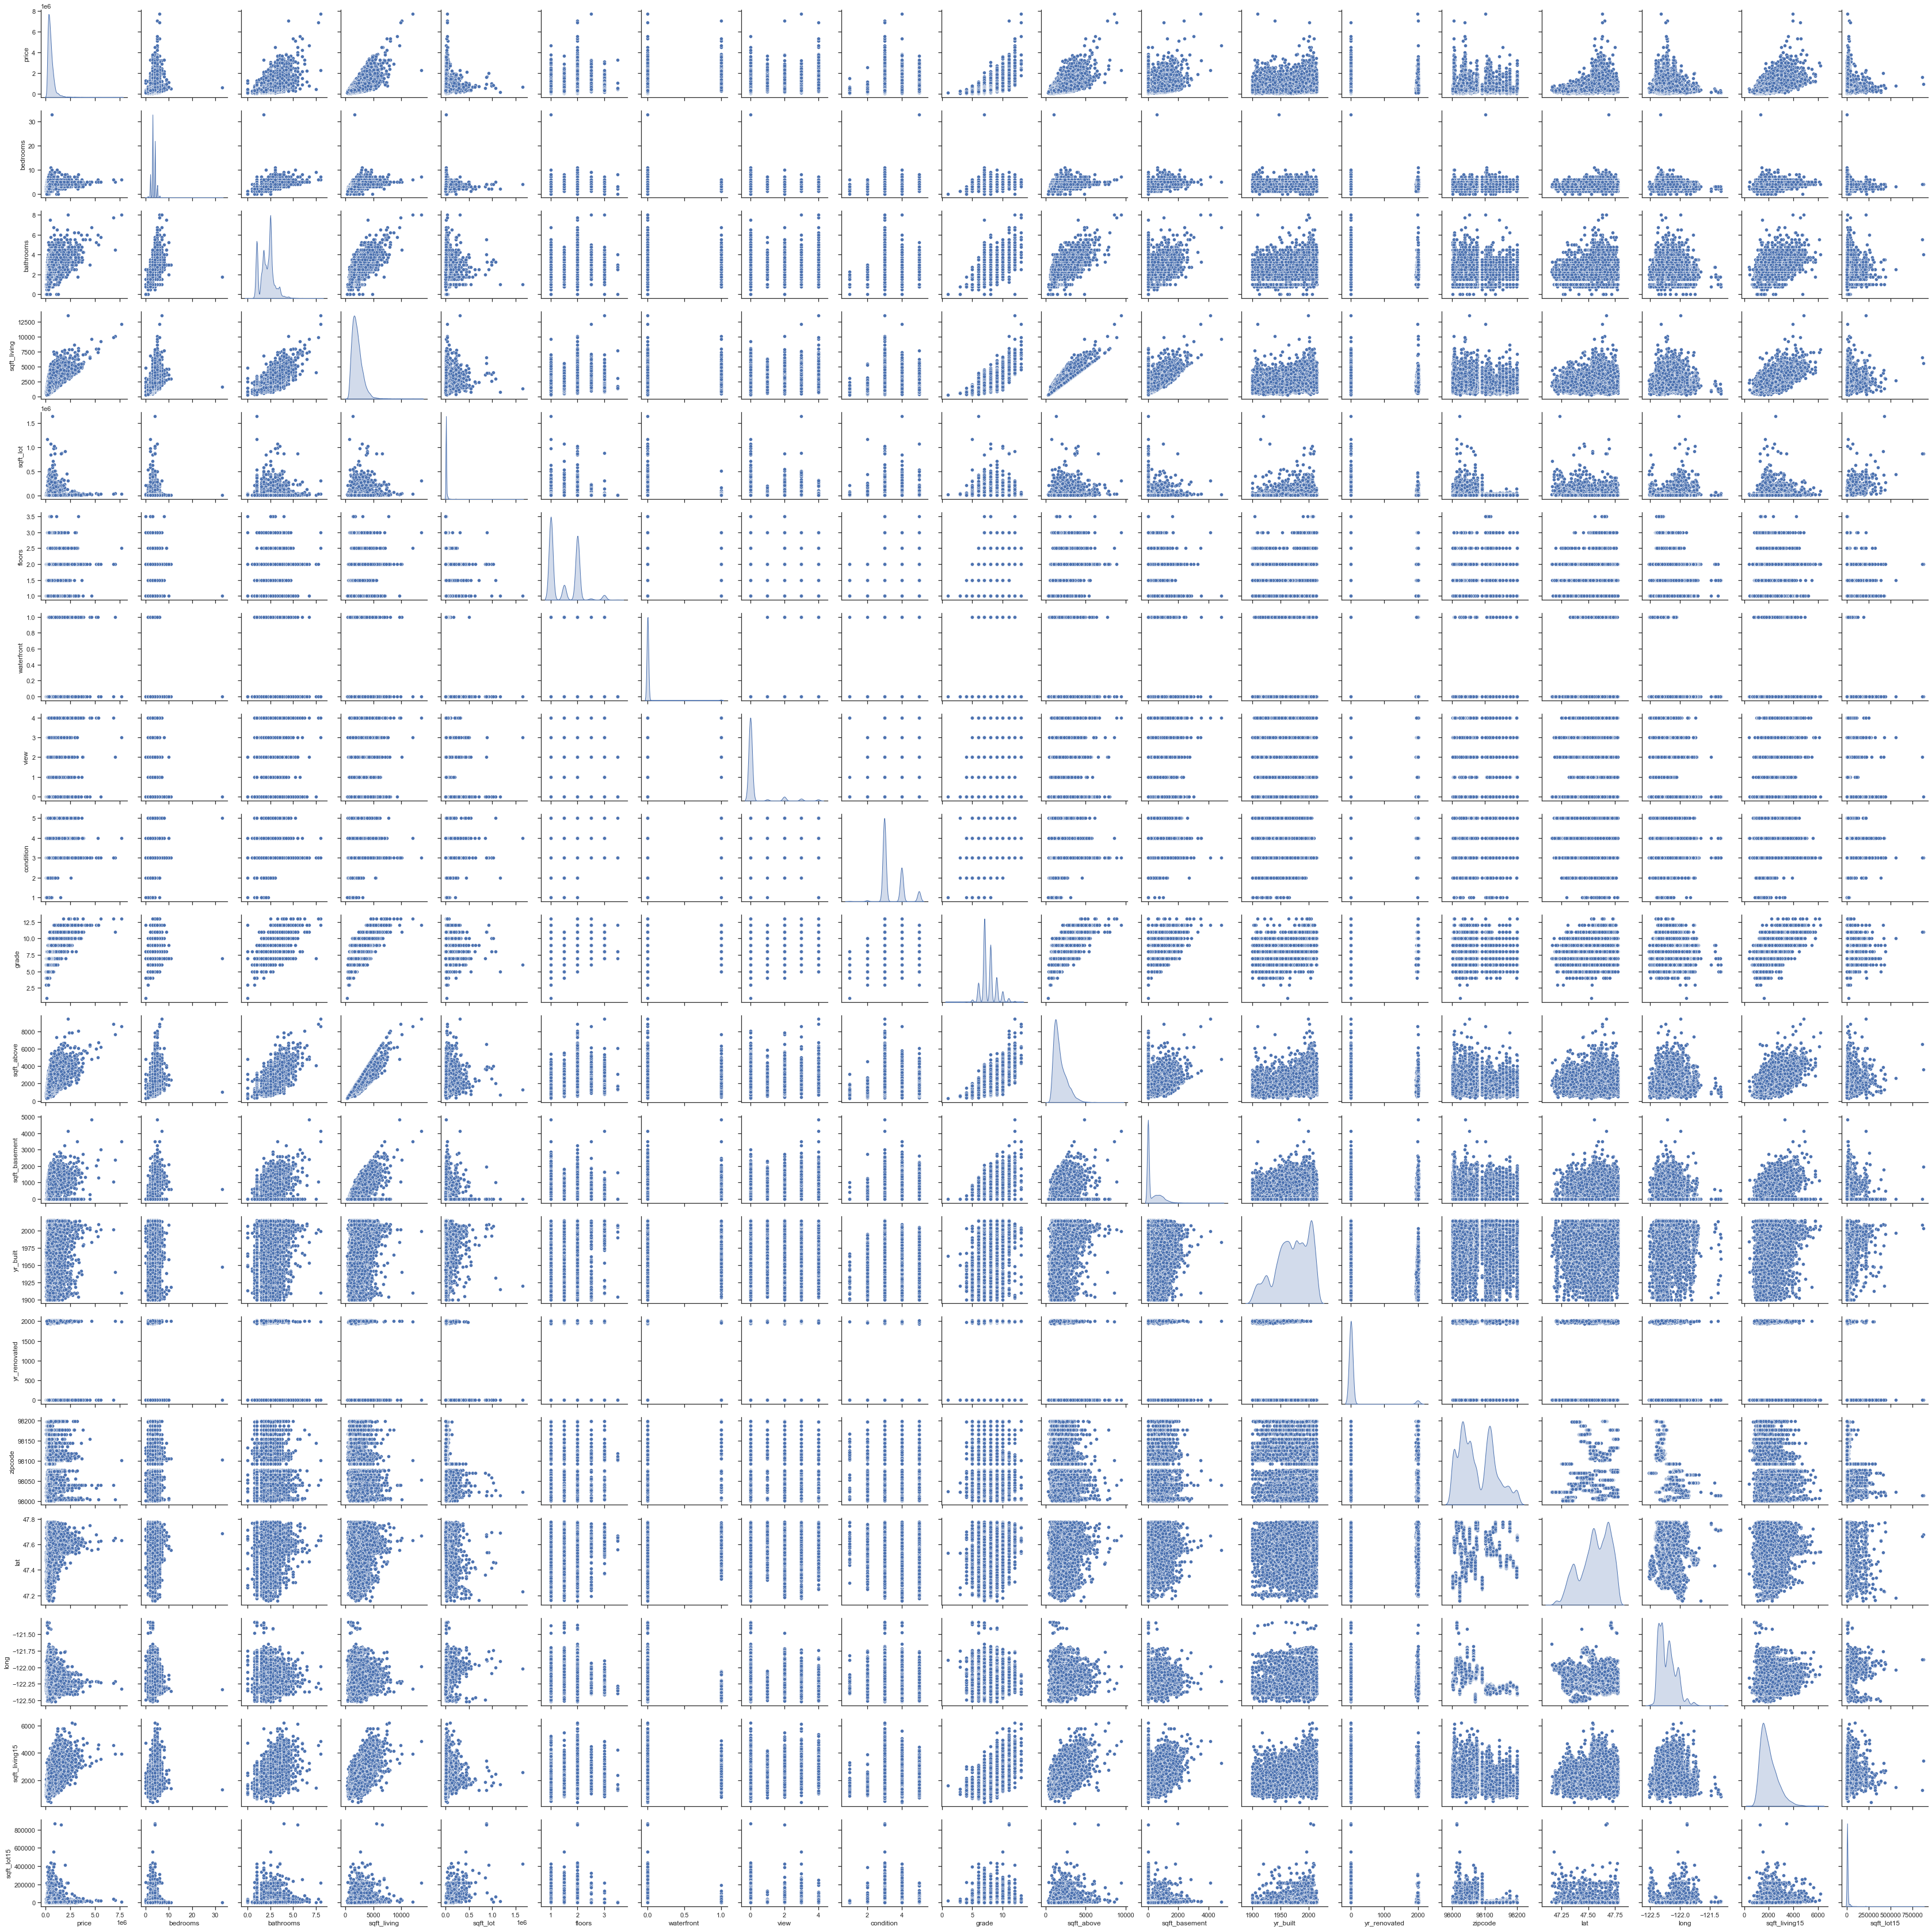

In [44]:
sns.set(style="ticks")
sns.pairplot(data, diag_kind='kde')
plt.show()

# Plot the Correlation Between Attributes using Heat Map

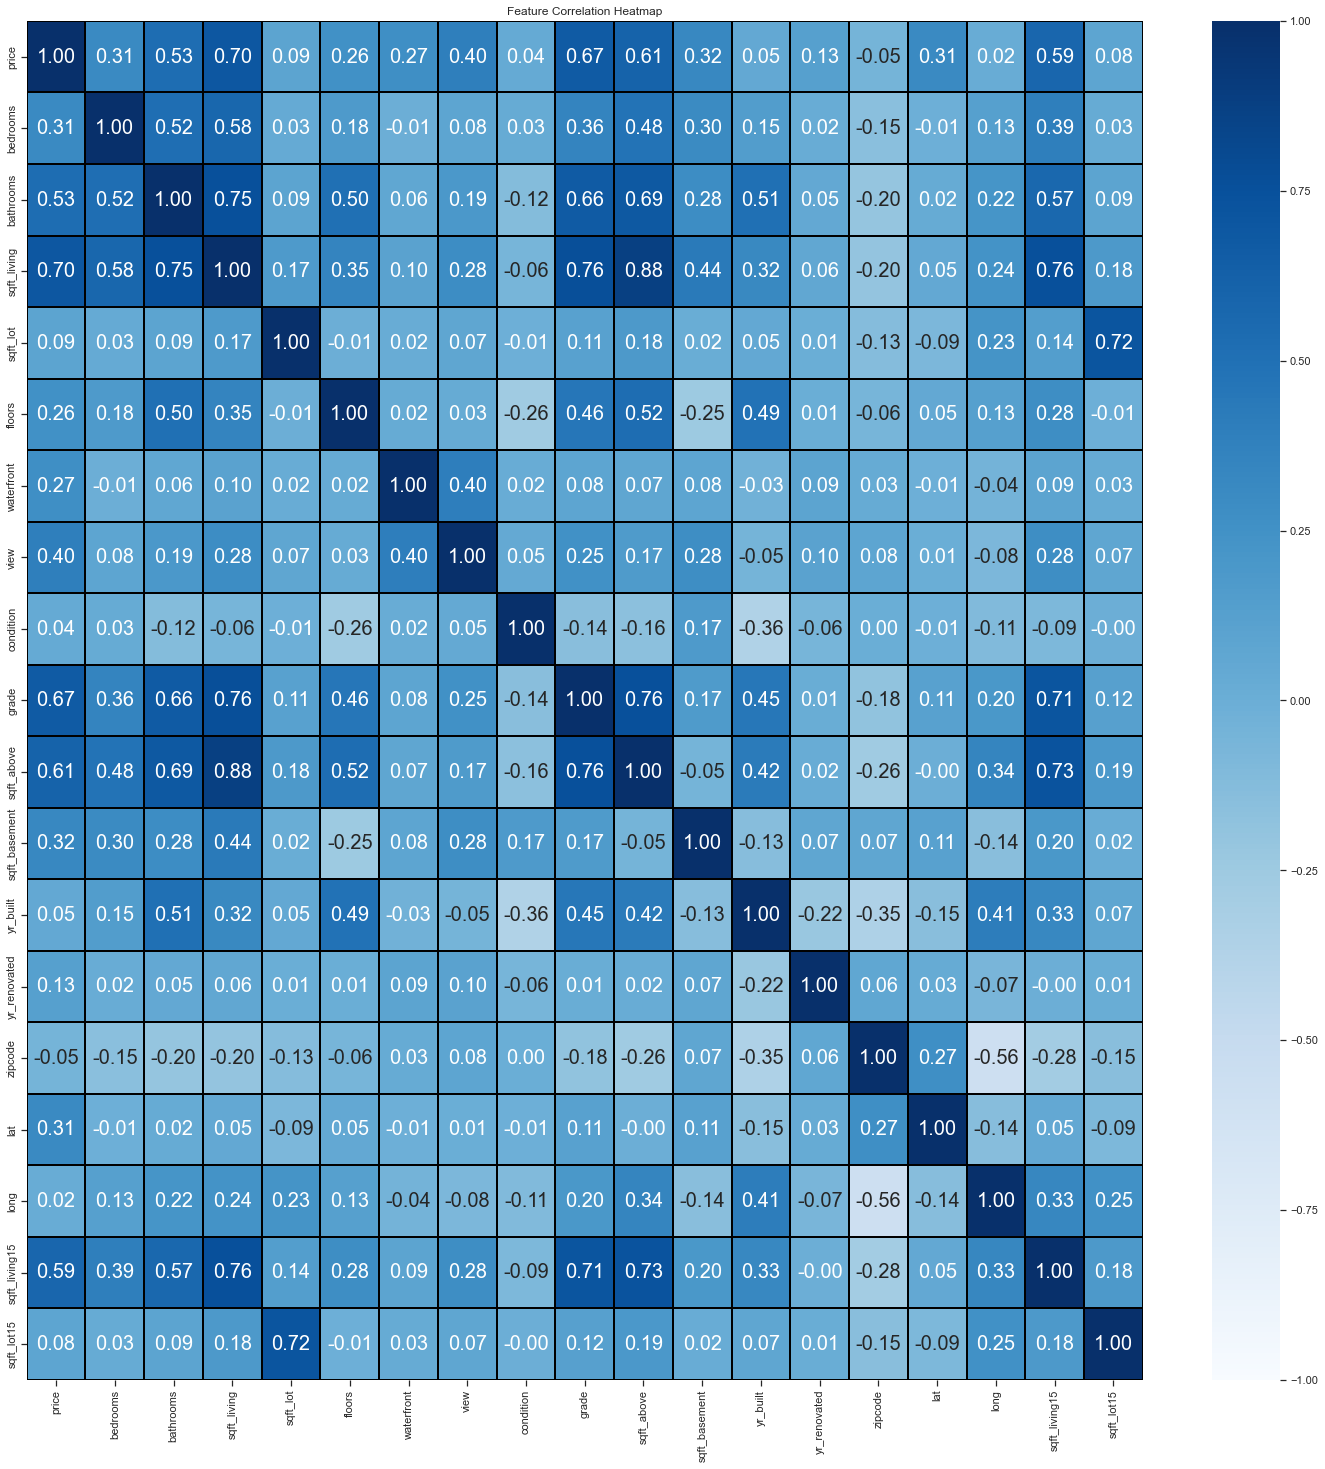

In [45]:
correlation_matrix = data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=1.5,annot_kws={'size':20},
            linecolor='black',center=False,vmax=1,vmin=-1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [48]:
df = pd.DataFrame(data)
df['year'] = df['date'].apply(lambda x: x[:4])
df.date.value_counts().head(10)

20140623T000000    142
20140626T000000    131
20140625T000000    131
20140708T000000    127
20150427T000000    126
20150325T000000    123
20150422T000000    121
20140709T000000    121
20150428T000000    121
20150414T000000    121
Name: date, dtype: int64

In [49]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [50]:
df = df.drop("date", axis=1)

In [51]:
df['year'] = df['year'].astype(int)
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year               int32
month              int64
day                int64
dtype: object

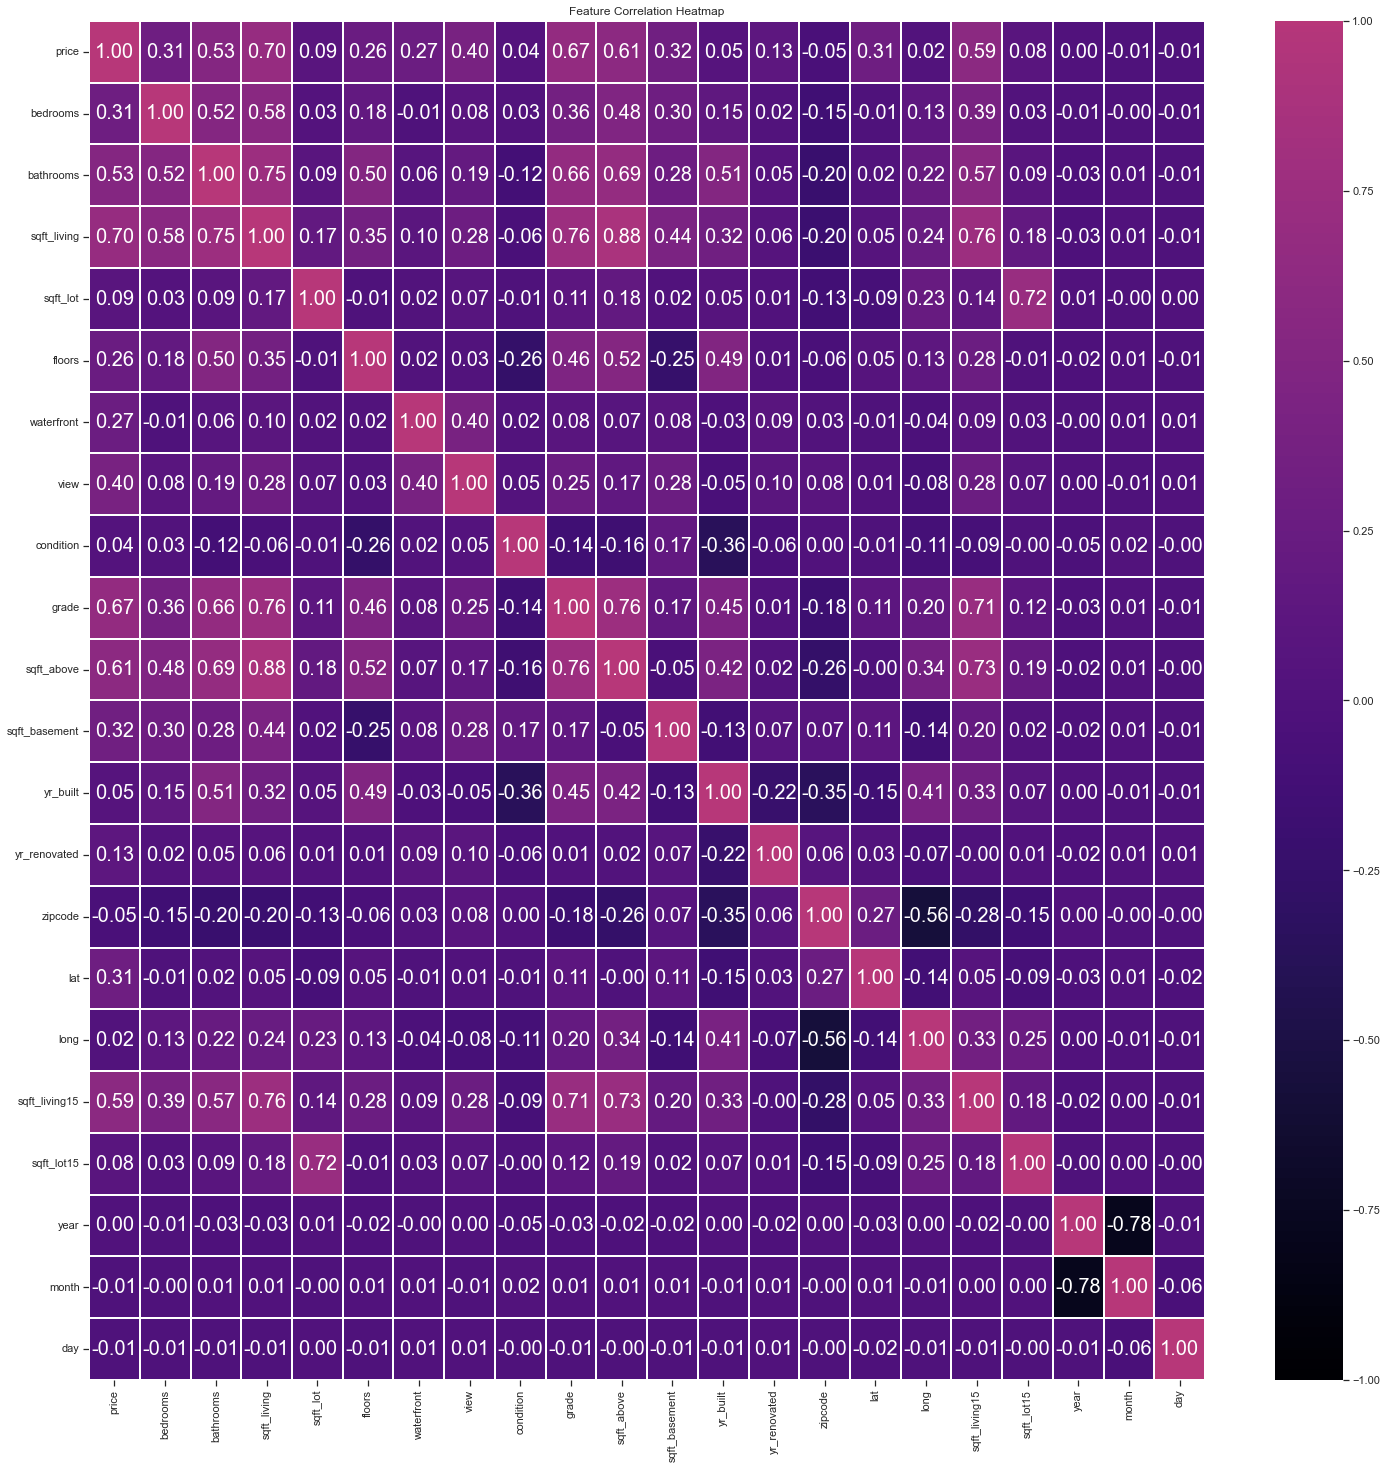

In [59]:
correlation_matrix = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=1.5,annot_kws={'size':20},
            linecolor='white',center=True,vmax=1,vmin=-1)
plt.title('Feature Correlation Heatmap')
plt.show()

In [72]:
y= df['price']
X = df.drop(['price'], axis=1)
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  sqft_above  ...  yr_built  yr_renovated  zipcode  \
0          3      7        1180  ...      1955             0    98178   
1          3      7        2170  ...      1951          1991    98125   
2          3      6         770  ...      1933             0    98028   
3          5      7        1050  ...      1965             0    98136   
4          3      8        1680  ...      1987             0    98074   

       lat     long  sqft_living15  sqft_lot15  year  month  day  
0  47.5112 -122.257           1340        5650  2014     10   13  
1  47.7210 -122.319           1690        7639  2014     12    9  
2  47.7379 -122.233           2720        8062  2015      2   25  
3  47.5208 -122.393           1360        5000  2014     12    9  
4  47.6168 -122.045           1800        7503  2015      2   18  

[5 rows x 21 columns]

# Model Training

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)


svm_predicted_price = svm_regressor.predict(X_test)


dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)


dt_predicted_price = dt_regressor.predict(X_test)


rf_regressor = RandomForestRegressor(n_estimators=200, random_state=0)
rf_regressor.fit(X_train, y_train)


rf_predicted_price = rf_regressor.predict(X_test)


lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)


lr_predicted_price = lr_regressor.predict(X_test)

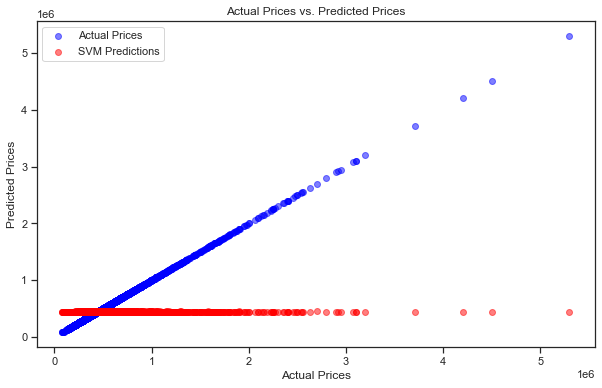

In [63]:
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)


plt.scatter(y_test, svm_predicted_price, color='red', label='SVM Predictions', alpha=0.5)



plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='upper left')


plt.show()

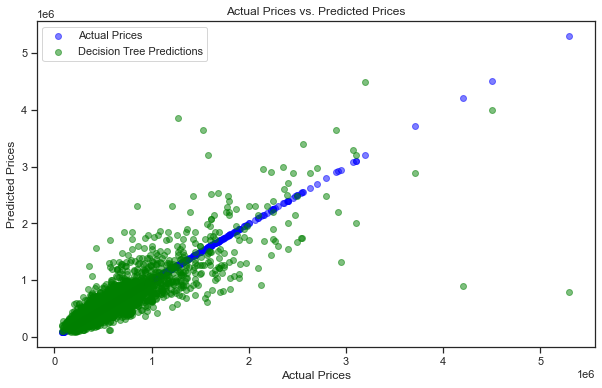

In [64]:
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)

plt.scatter(y_test, dt_predicted_price, color='green', label='Decision Tree Predictions', alpha=0.5)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='upper left')


plt.show()

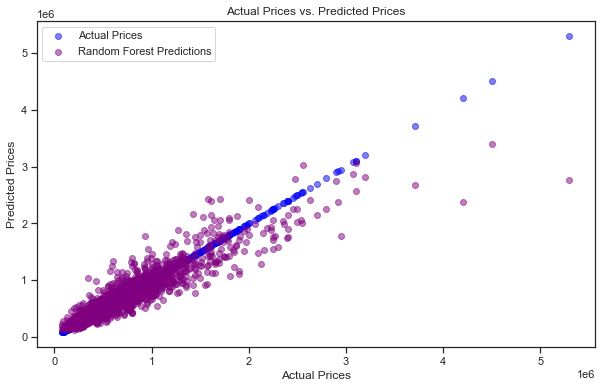

In [65]:
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)

plt.scatter(y_test, rf_predicted_price, color='purple', label='Random Forest Predictions', alpha=0.5)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='upper left')


plt.show()

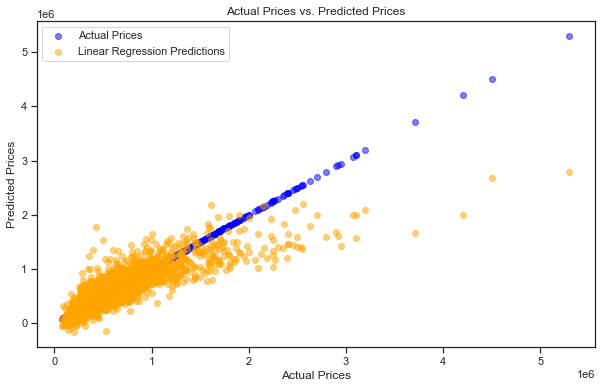

In [66]:
plt.figure(figsize=(10, 6))


plt.scatter(y_test, y_test, color='blue', label='Actual Prices', alpha=0.5)

plt.scatter(y_test, lr_predicted_price, color='orange', label='Linear Regression Predictions', alpha=0.5)
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(loc='upper left')


plt.show()

In [67]:
svm_mse = mean_squared_error(y_test, svm_predicted_price)

dt_mse = mean_squared_error(y_test, dt_predicted_price)

rf_mse = mean_squared_error(y_test, rf_predicted_price)

lr_mse = mean_squared_error(y_test, lr_predicted_price)
print('SVM Mean Squared Error:', svm_mse)


print('Decision Tree Mean Squared Error:', dt_mse)


print('Random Forest Mean Squared Error:', rf_mse)


print('Linear Regression Mean Squared Error:', lr_mse)

SVM Mean Squared Error: 142476682342.56592
Decision Tree Mean Squared Error: 39606120109.69286
Random Forest Mean Squared Error: 16507083924.662228
Linear Regression Mean Squared Error: 38992020589.103294


In [68]:
# Create a dictionary to store MAE for each model
mae_metrics = {
    'SVM': svm_mse,
    'Decision Tree': dt_mse,
    'Random Forest': rf_mse,
    'Linear Regression': lr_mse
}

# Determine the model with the lowest MAE
best_model_mae = min(mae_metrics, key=lambda model: mae_metrics[model])

print(f'The best model based on MAE is: {best_model_mae}')

The best model based on MAE is: Random Forest
